In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
orders=pd.read_csv("../data/orders.csv")
orders.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [26]:
orders.shape

(3421083, 7)

# missing values analysis 
# we examine missing values so the data is complete to keep the model as accurate as possible 

In [27]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

the column days_since_prior_order contains missing values 

In [28]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [29]:
hour_counts=orders['order_hour_of_day'].value_counts().sort_index()

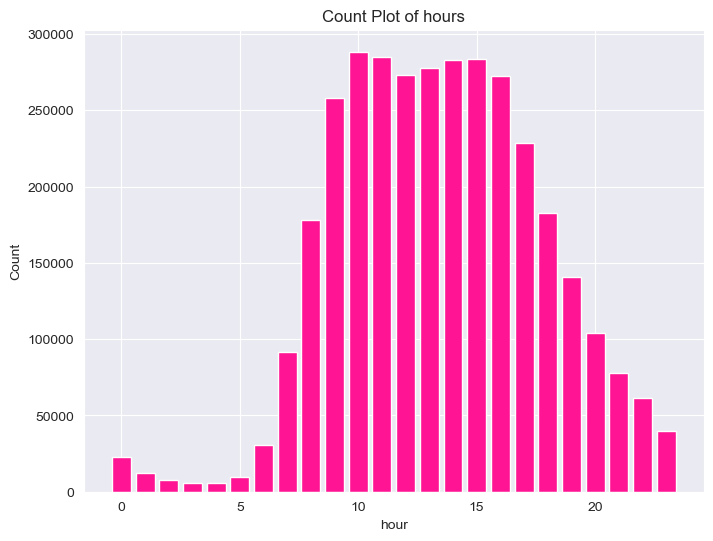

In [30]:
plt.figure(figsize=(8,6))
plt.bar(hour_counts.index,hour_counts,color='deeppink')
plt.title('Count Plot of hours')
plt.xlabel('hour')
plt.ylabel('Count')
#see if i should add the grid to the plot so i can read the numbers easily or will it be considered as a higher ai value
plt.show()

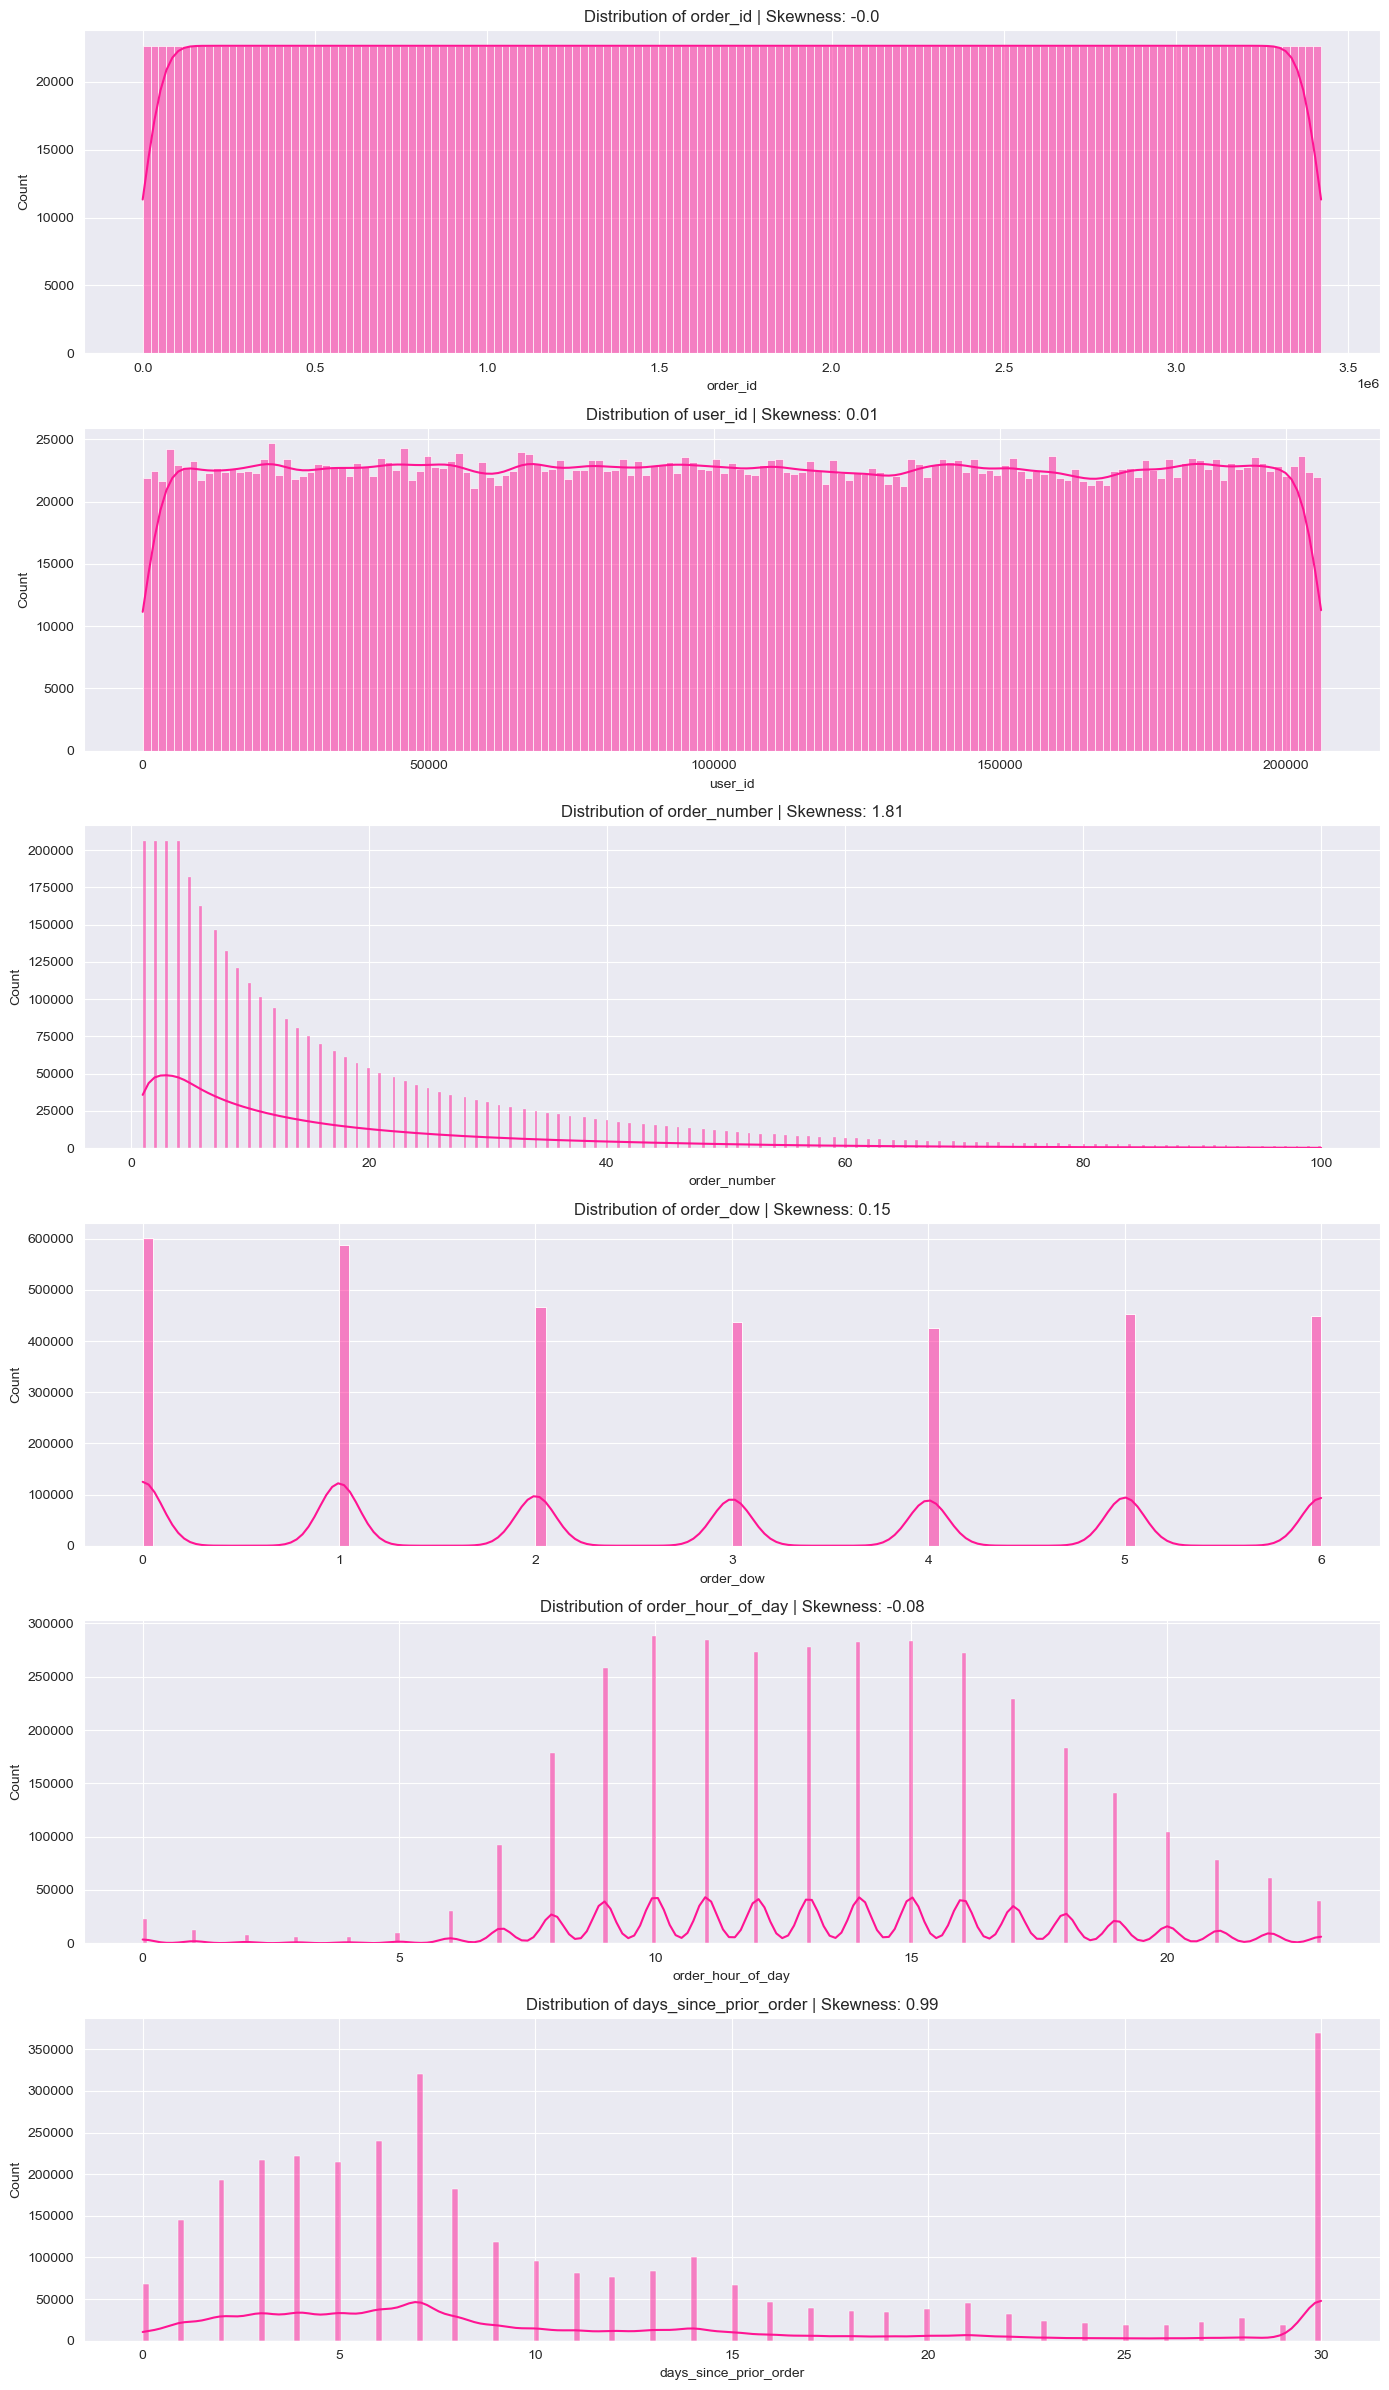

In [31]:
sns.set_style("darkgrid")
numerical_columns = orders.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 4))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    sns.histplot(orders[feature], kde=True, color="deeppink")
    plt.title(f"Distribution of {feature} | Skewness: {round(orders[feature].skew(), 2)}")
plt.tight_layout()
plt.show()

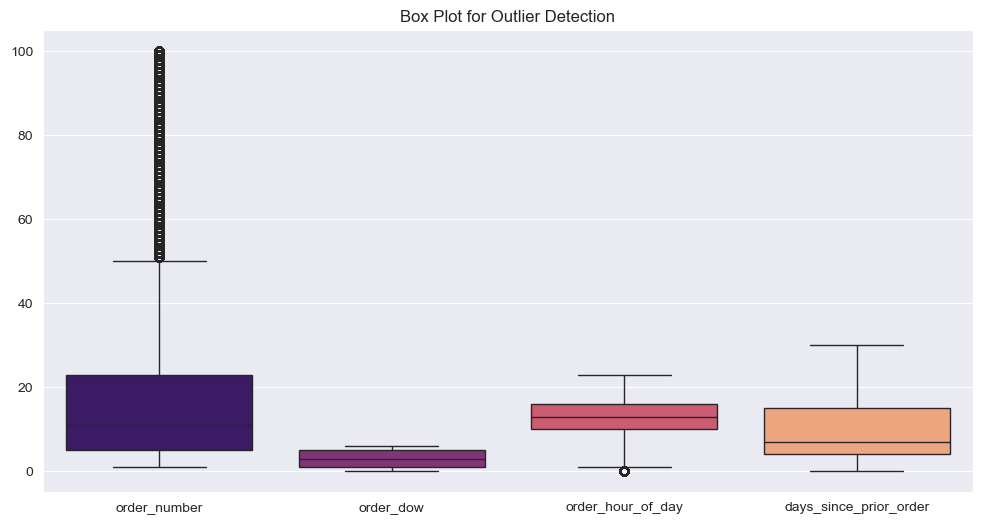

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders[['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']], palette='magma')
plt.title('Box Plot for Outlier Detection')
plt.show()

In [34]:
!pip install missingno

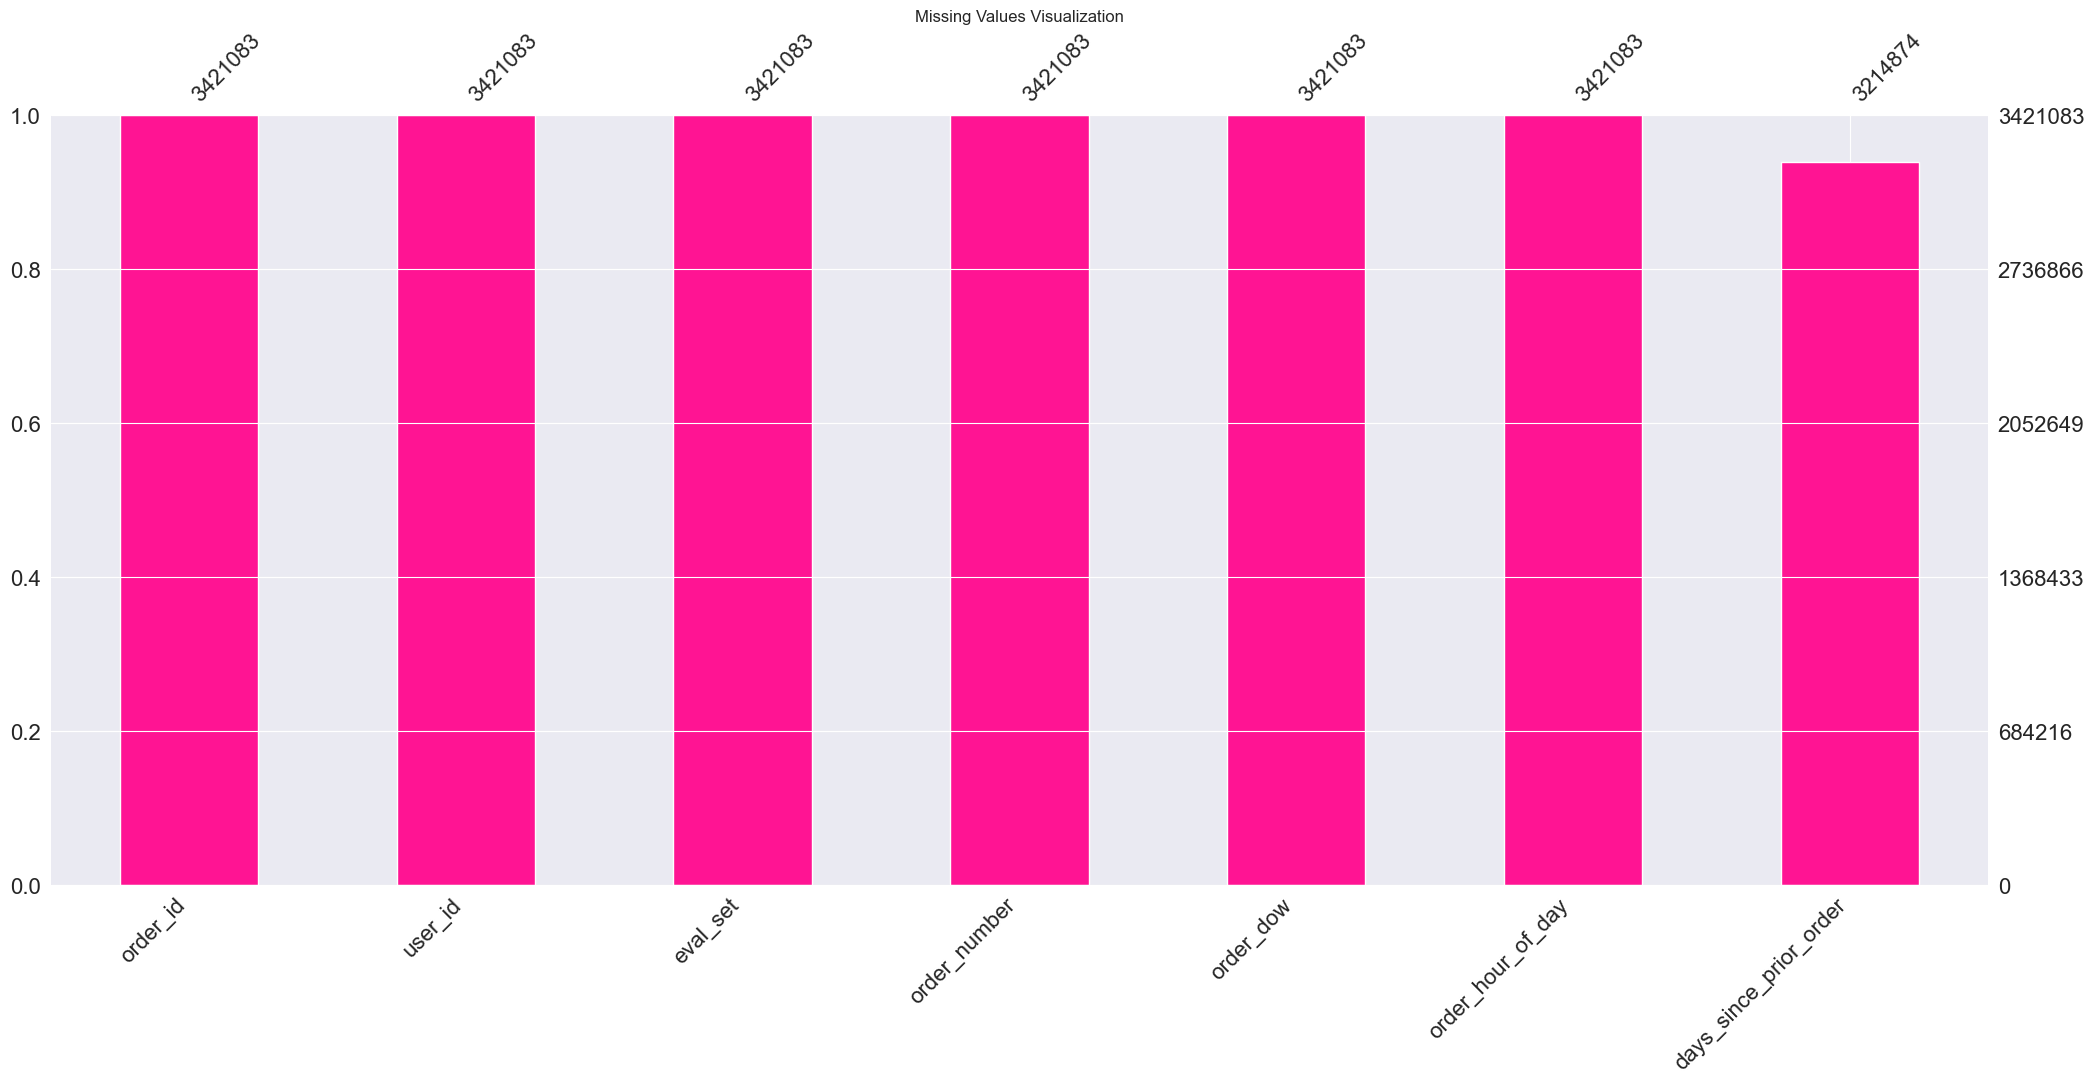

In [35]:
import missingno as msno
msno.bar(orders, color="deeppink")
plt.title('Missing Values Visualization')
plt.show()